In [45]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [57]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2 * n_data, std=1)
x1 = torch.normal(-2 * n_data, std=1)
y0 = torch.zeros(100)
y1 = torch.ones(100)

In [58]:
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), 0).type(torch.LongTensor)

In [59]:
x, y = Variable(x), Variable(y)

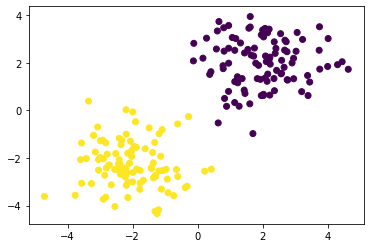

In [60]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy())
plt.show()
# c refer to color

In [61]:
import torch.nn.functional as F

In [1]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

    
net = Net(n_feature=2, n_hidden=10, n_output=2)

NameError: name 'nn' is not defined

In [63]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

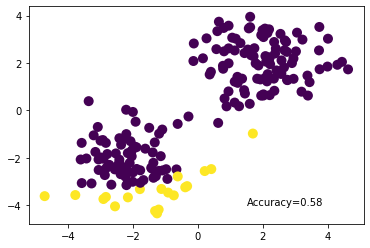

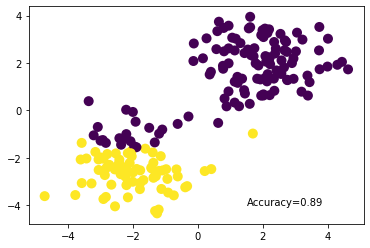

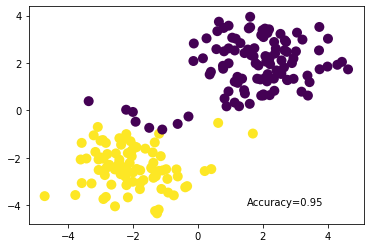

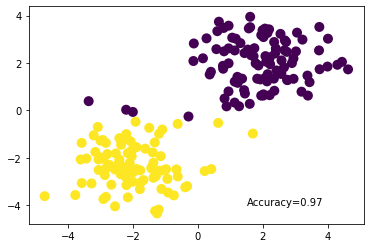

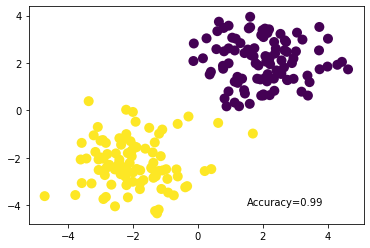

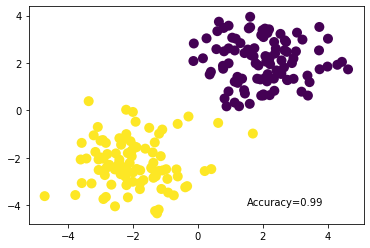

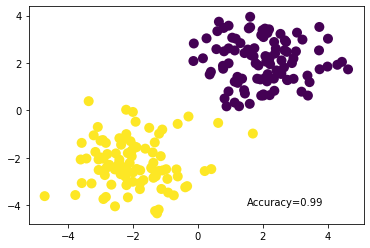

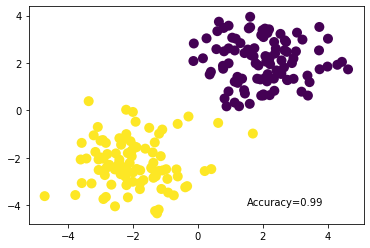

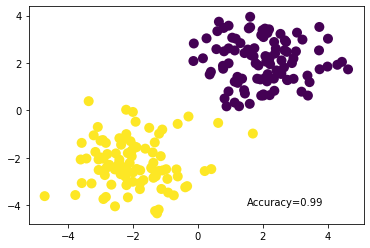

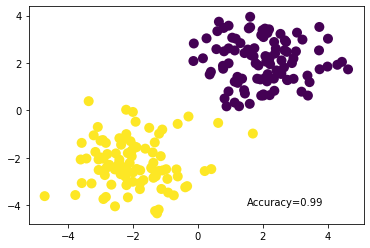

In [64]:
plt.ion()
plt.show()
for t in range(100):
    out = net(x)  # out has two choice, we except it is 0 when the former is greater and 1 when the latter is greater
                  # so we can regard index as the prediction.
    loss = loss_func(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 10 ==0:
        plt.cla()
        prediction = torch.max(F.softmax(out, dim=1), dim=1)[1]
        # F.softmax(tensor, dim)-> convert tensor to posibility with softmax function at dim
        # toch.max(tensor, dim)-> return two tensors, one is the value of maximum data at special dim while the other is the crossponding index 
        # [1] get the index tensor
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0) # To visualize the training process, we paint 
                                                                                       # every point with pred_y(0, 1) as different color.  
        accuracy = sum(pred_y == target_y)/200  # compute accuracy
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy)
        plt.pause(0.1)

plt.ioff()  # stop
plt.show()

In [ ]:
# torch.max, F.softmax

In [77]:
y = torch.rand((3,4))
print(y)

tensor([[0.7633, 0.9488, 0.2316, 0.0716],
        [0.5057, 0.3699, 0.8000, 0.5065],
        [0.8358, 0.5676, 0.6537, 0.9734]])


In [79]:
out = F.softmax(y, dim=1)
print(out)

tensor([[0.3038, 0.3656, 0.1785, 0.1521],
        [0.2372, 0.2071, 0.3183, 0.2374],
        [0.2670, 0.2042, 0.2225, 0.3064]])


In [81]:
out_max = torch.max(out, dim=1)
print(out_max)

torch.return_types.max(
values=tensor([0.3656, 0.3183, 0.3064]),
indices=tensor([1, 2, 3]))
